IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

LOADING DATASET

In [2]:
df = pd.read_csv(r"C:\AMAZONSALES\ams_analysis.csv")


DISPLAYING BASIC INFO
DATA CLEANING

In [3]:
print("Shape of Dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
#Displays statistics like mean, median, standard deviation, min, and max for numeric columns.
print("\nSummary Statistics:\n", df.describe())

Shape of Dataset: (1350, 16)

Data Types:
 product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count             int64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

Missing Values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Summary Statist

In [4]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                category  discounted_price  actual_price  discount_percentage  \
0  Computers&Accessories             399.0        1099.0                   64   
1  Computers&Accessories             199.0         349.0                   43   
2  Computers&Accessories             199.0        1899.0                   90   
3  Computers&Accessories             329.0         699.0                   53   
4  Computers&Accessories             154.0         399.0                   61   

   rating  rating_count                                      about_product  \
0     4.2 

EXPLOTARY DATA ANALYSIS(EDA)  

In [5]:
# Set plot style
sns.set(style="whitegrid")
# Create a bar plot for the 'Product Category' column
plt.figure(figsize=(18, 20))

<Figure size 1800x2000 with 0 Axes>

<Figure size 1800x2000 with 0 Axes>

Text(0.5, 1.0, 'Actual Price vs Discounted Price')

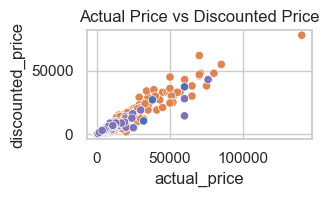

In [6]:
# Plot 1: Actual Price vs Discounted Price
plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x='actual_price', y='discounted_price', hue='category', legend=False)
plt.title('Actual Price vs Discounted Price')


Text(0.5, 1.0, 'Rating vs Discount Percentage')

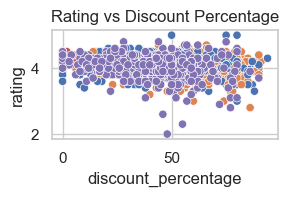

In [7]:
# Plot 2: Rating vs Discount Percentage
plt.subplot(3, 2, 2)
sns.scatterplot(data=df, x='discount_percentage', y='rating', hue='category', legend=False)
plt.title('Rating vs Discount Percentage')

C:\Users\Pc\AppData\Local\Temp\ipykernel_24364\2796587109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


Text(0.5, 0, 'Count')

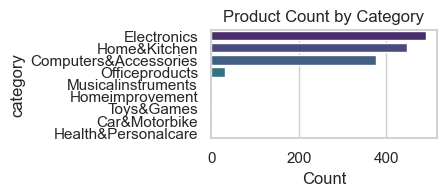

In [8]:
# Plot 3: Product Count by Category
plt.subplot(3, 2, 4)
category_counts = df['category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Product Count by Category')
plt.xlabel('Count')

Text(0.5, 1.0, 'Correlation Heatmap')

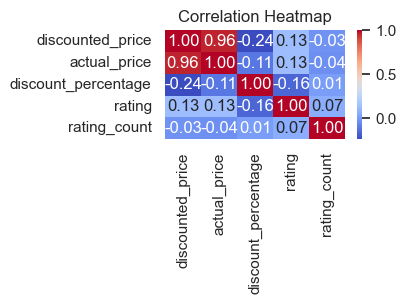

In [9]:
# Plot 4: Correlation Heatmap
plt.subplot(3, 2, 4)
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')


C:\Users\Pc\AppData\Local\Temp\ipykernel_24364\1324055484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x='rating', y='product_name', palette='magma')


Text(0.5, 0, 'Rating')

C:\Users\Pc\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 132 (\x84) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\Pc\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 132 (\x84) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


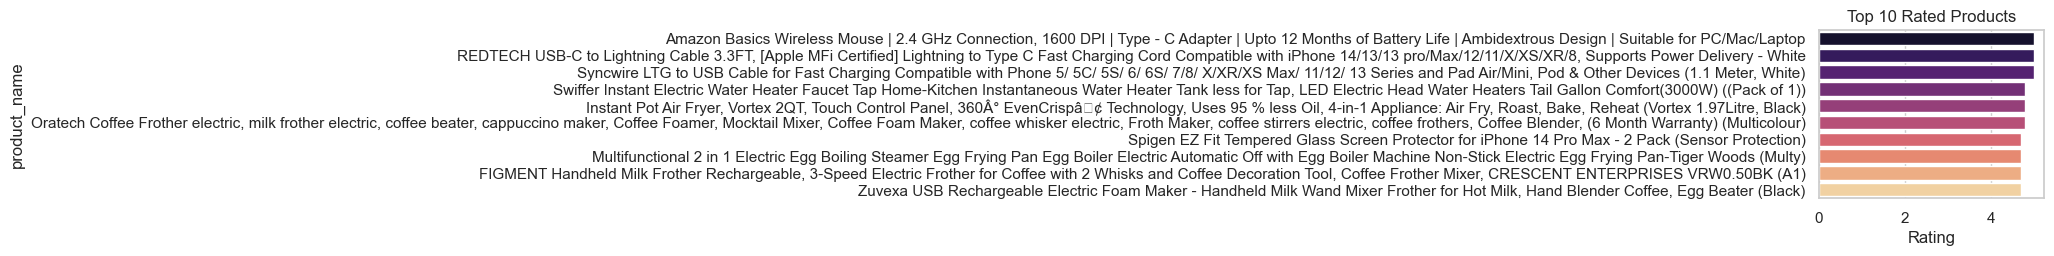

In [10]:
# Plot 5: Top 10 Rated Products
plt.subplot(2, 2, 4)
top_rated = df.sort_values(by='rating', ascending=False).head(10)
sns.barplot(data=top_rated, x='rating', y='product_name', palette='magma')
plt.title('Top 10 Rated Products')
plt.xlabel('Rating')

Text(0.5, 0, 'Rating Count')

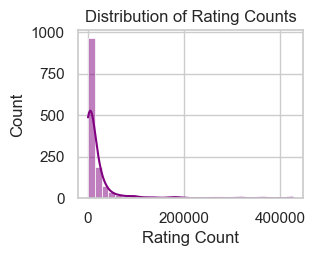

In [11]:
# Plot 6: Rating Count Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['rating_count'], bins=30, kde=True, color='purple')
plt.title('Distribution of Rating Counts')
plt.xlabel('Rating Count')

In [12]:

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Outlier Detection Functions


In [23]:
#IQR Method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers


In [14]:
#Z-Score Method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    return data[(z_scores > threshold) | (z_scores < -threshold)]


In [15]:
#Outlier Summary Calculation
from scipy.stats import zscore

outlier_summary = {}
for col in numeric_cols:
    iqr_outliers = detect_outliers_iqr(df, col)
    z_outliers = detect_outliers_zscore(df, col)
    outlier_summary[col] = {
        "IQR_Outliers": iqr_outliers.shape[0],
        "ZScore_Outliers": z_outliers.shape[0]
    }


In [16]:
# Printing Outlier Summary
print("\n🔍 Outlier Summary:")
for col, counts in outlier_summary.items():
    print(f"{col}: IQR = {counts['IQR_Outliers']}, Z-score = {counts['ZScore_Outliers']}")



🔍 Outlier Summary:
discounted_price: IQR = 209, Z-score = 40
actual_price: IQR = 185, Z-score = 36
discount_percentage: IQR = 0, Z-score = 0
rating: IQR = 19, Z-score = 17
rating_count: IQR = 132, Z-score = 30


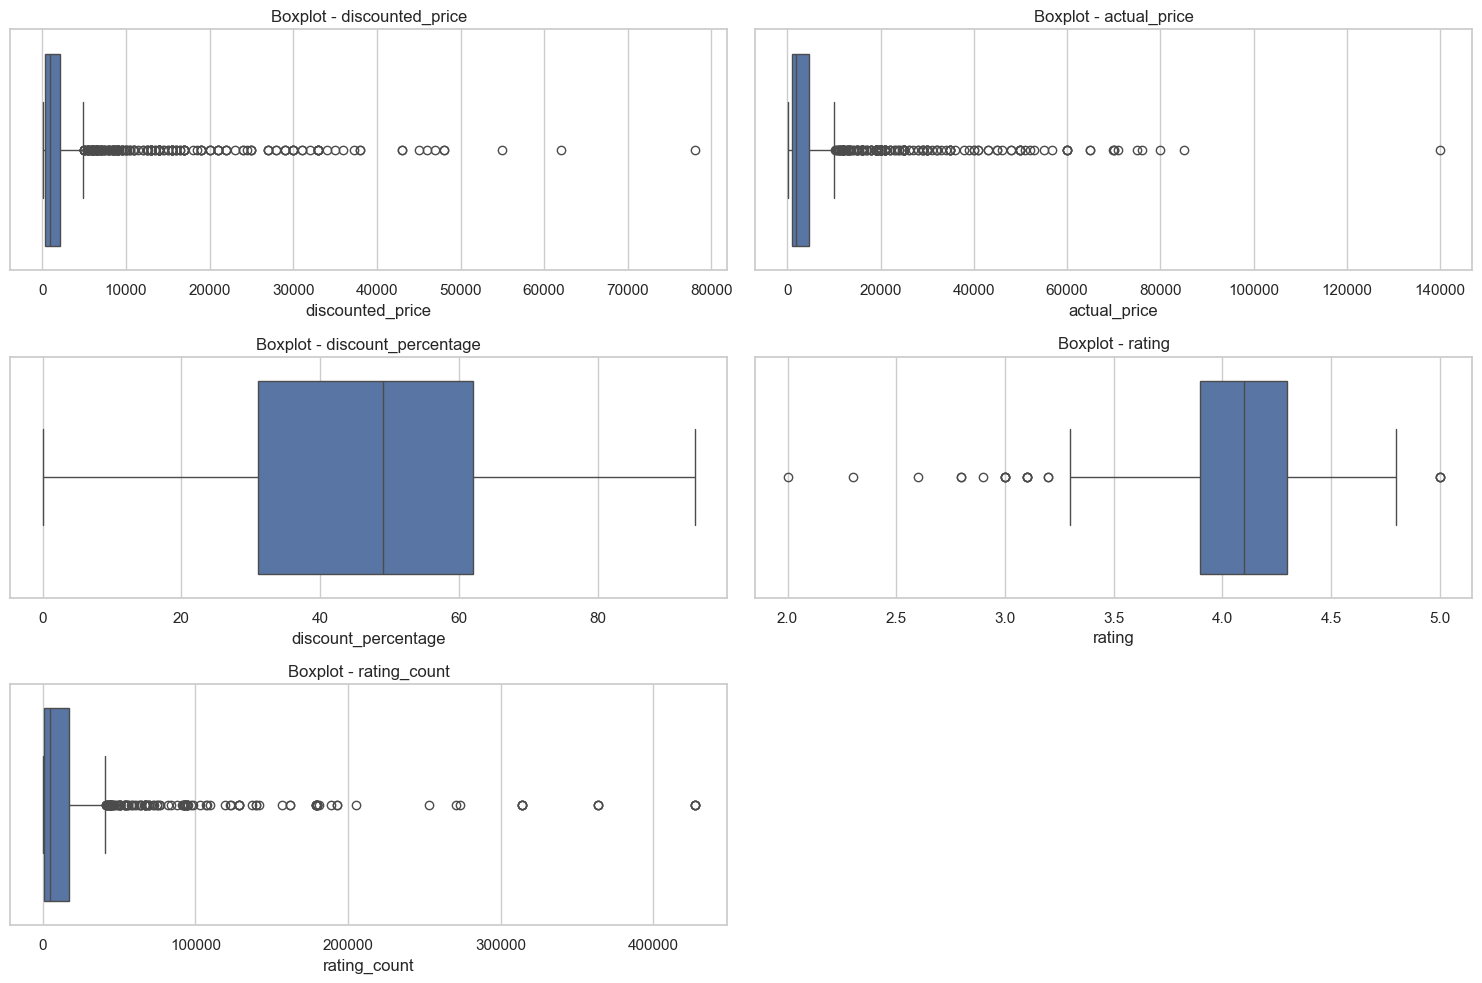

In [17]:
#Boxplot Visualization of Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')


In [28]:
# Calculate Q1 and Q3
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outlier_criteria = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Identify rows with any outliers
outliers = outlier_criteria.any(axis=1)


In [29]:
# Remove outliers
cleaned_df = df[~outliers]


In [30]:
# Save the cleaned DataFrame to a CSV file
cleaned_df.to_csv("cleaned_amazon_sales.csv", index=False)

print("Cleaned data saved to 'cleaned_amazon_sales.csv'.")


Cleaned data saved to 'cleaned_amazon_sales.csv'.
